#**ML Vehicle Machanic and Garage Tracker**

##**Load Data**

In [1]:
import pandas as pd
df = pd.read_csv('/content/ML Car Diagnostic Agent AI Assistant.csv')
df

,Record ID,Car Name,Problem Classification,Problem Description,Severity,Diagnosis,How to Fix the Problem,Solution Used,ECU Data,Service History,Repair Status,Results
0,1,Honda Civic 2019,Electrical,Headlights flicker,Medium,Loose wiring,Check and repair loose or damaged wiring conne...,Check and repair wiring,NaN,Spark plugs replaced 2 years ago,Fixed,Resolved
1,2,Toyota Corolla 2018,Electrical,Power window failure,Medium,Window regulator motor,Check and repair loose or damaged wiring conne...,Check and repair wiring,Multiple codes,Spark plugs replaced 2 years ago,Fixed,Resolved
2,3,BMW i4 2019,Engine,Engine misfire,High,Timing belt failure,Replace spark plugs,Replaced failure,P0101,Regular maintenance,Fixed,Resolved
3,4,Nissan Rogue 2020,Transmission,Transmission overheating,High,Transmission fluid thick,Perform transmission service and inspect for i...,Perform transmission service,NaN,Spark plugs replaced 2 years ago,Fixed,Resolved
4,5,Mercedes S-Class 2020,Battery,Battery drains fast,High,Dead battery,Replace battery and test charging system,Replaced battery,NaN,Brake service 1 year ago,Fixed,Resolved
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Honda Civic 2017,Engine,Check engine light on,Medium,Ignition coil failure,Replace spark plugs,Replaced failure,Multiple codes,Oil changed 6 months ago,Fixed,Resolved
9996,9997,Chevrolet Traverse 2016,Battery,Clicking sound when starting,High,Starter motor failure,Test charging system,Test charging system,NaN,Battery replaced 1 year ago,Fixed,Resolved
9997,9998,Honda Passport 2023,Electrical,Battery drains fast,Low,Wiring issue,Replace battery and test charging system,Replaced issue,NaN,NaN,Fixed,Resolved
9998,9999,Mercedes E-Class 2020,Battery,Battery drains fast,Low,Charging system fault,Replace alternator and test battery condition,Replaced fault,Multiple codes,Brake service 1 year ago,Fixed,Resolved


## **Data Preparation**

### Data Separation as X and y

In [7]:
y = df['Results']
y

,Results
0,Resolved
1,Resolved
2,Resolved
3,Resolved
4,Resolved
...,...
9995,Resolved
9996,Resolved
9997,Resolved
9998,Resolved


In [8]:
x = df.drop('Results', axis=1)
x

,Record ID,Car Name,Problem Classification,Problem Description,Severity,Diagnosis,How to Fix the Problem,Solution Used,ECU Data,Service History,Repair Status
0,1,Honda Civic 2019,Electrical,Headlights flicker,Medium,Loose wiring,Check and repair loose or damaged wiring conne...,Check and repair wiring,NaN,Spark plugs replaced 2 years ago,Fixed
1,2,Toyota Corolla 2018,Electrical,Power window failure,Medium,Window regulator motor,Check and repair loose or damaged wiring conne...,Check and repair wiring,Multiple codes,Spark plugs replaced 2 years ago,Fixed
2,3,BMW i4 2019,Engine,Engine misfire,High,Timing belt failure,Replace spark plugs,Replaced failure,P0101,Regular maintenance,Fixed
3,4,Nissan Rogue 2020,Transmission,Transmission overheating,High,Transmission fluid thick,Perform transmission service and inspect for i...,Perform transmission service,NaN,Spark plugs replaced 2 years ago,Fixed
4,5,Mercedes S-Class 2020,Battery,Battery drains fast,High,Dead battery,Replace battery and test charging system,Replaced battery,NaN,Brake service 1 year ago,Fixed
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Honda Civic 2017,Engine,Check engine light on,Medium,Ignition coil failure,Replace spark plugs,Replaced failure,Multiple codes,Oil changed 6 months ago,Fixed
9996,9997,Chevrolet Traverse 2016,Battery,Clicking sound when starting,High,Starter motor failure,Test charging system,Test charging system,NaN,Battery replaced 1 year ago,Fixed
9997,9998,Honda Passport 2023,Electrical,Battery drains fast,Low,Wiring issue,Replace battery and test charging system,Replaced issue,NaN,NaN,Fixed
9998,9999,Mercedes E-Class 2020,Battery,Battery drains fast,Low,Charging system fault,Replace alternator and test battery condition,Replaced fault,Multiple codes,Brake service 1 year ago,Fixed


###**Data Splitting**

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [11]:
x_train

,Record ID,Car Name,Problem Classification,Problem Description,Severity,Diagnosis,How to Fix the Problem,Solution Used,ECU Data,Service History,Repair Status
8369,8370,Honda Passport 2023,Electrical,Car wont start,Low,Dead battery,Check and repair loose or damaged wiring conne...,Check and repair wiring,Multiple codes,NaN,Fixed
9722,9723,Chevrolet Spark 2018,Transmission,Transmission overheating,High,Transmission fluid low,Refill transmission fluid,Refill transmission fluid,P0301,Transmission service 2 years ago,Fixed
6950,6951,Nissan Altima 2023,Electrical,Dashboard flickering,Medium,Dead battery,Secure and repair connections,Secure and repair connections,P0200,NaN,Fixed
1919,1920,Nissan Pathfinder 2022,Battery,Battery drains fast,Medium,Starter motor failure,Replace starter motor,Replaced failure,NaN,Spark plugs replaced 2 years ago,Fixed
5713,5714,Mercedes A-Class 2018,Engine,Engine overheating,Medium,Fuel pump issue,Replace fuel pump,Replaced issue,P0430,NaN,Fixed
...,...,...,...,...,...,...,...,...,...,...,...
350,351,Hyundai Tucson 2020,Transmission,Slipping gears,Medium,Transmission wear,Replace solenoid pack,Replaced wear,P0302,Spark plugs replaced 2 years ago,Fixed
79,80,Ford Mustang 2023,Engine,Engine stalling,Medium,Timing belt failure,Replace the catalytic converter with a new OEM...,Replaced failure,P0011,Regular maintenance,Fixed
8039,8040,Kia EV6 2018,Brakes,Soft brake pedal,Medium,Worn brake pads,Replace brake pads and rotors,Pending replace brake pads and rotors,NaN,Regular maintenance,Not Fixed
6936,6937,Honda Fit 2023,Engine,Engine overheating,Medium,Spark plug wear,Replace spark plugs,Replaced wear,Multiple codes,Spark plugs replaced 2 years ago,Fixed


In [12]:
x_test

,Record ID,Car Name,Problem Classification,Problem Description,Severity,Diagnosis,How to Fix the Problem,Solution Used,ECU Data,Service History,Repair Status
8018,8019,Kia Rio 2018,Transmission,Slipping gears,High,Transmission fluid thick,Refill transmission fluid,Refill transmission fluid,NaN,Oil changed 6 months ago,Fixed
9225,9226,Chevrolet Traverse 2021,Engine,Check engine light on,High,Timing belt failure,Replace timing belt,Replaced failure,NaN,NaN,Fixed
3854,3855,Chevrolet Traverse 2016,Transmission,Gear grinding,High,Clutch pack wear,Refill transmission fluid,Refill transmission fluid,Multiple codes,Transmission service 2 years ago,Fixed
2029,2030,Nissan Versa 2015,Engine,Smoke from exhaust,High,Timing belt failure,Replace the catalytic converter with a new OEM...,Pending replace catalytic converter,P0011,Brake service 1 year ago,Not Fixed
3539,3540,Kia Soul 2022,Battery,Car wont start,Medium,Dead battery,Replace starter motor,Replaced battery,NaN,Regular maintenance,Fixed
...,...,...,...,...,...,...,...,...,...,...,...
6923,6924,Mercedes G-Class 2021,Transmission,Gear shift hard,High,Transmission fluid low,Replace clutch packs,Replaced low,P0500,Coolant flush last year,Fixed
1207,1208,Mercedes G-Class 2015,Battery,Clicking sound when starting,Low,Faulty alternator,Replace alternator and test battery condition,Replaced alternator,Multiple codes,Oil changed 6 months ago,Fixed
7960,7961,Ford Focus 2023,Battery,Battery drains fast,Low,Starter motor failure,Test charging system,Test charging system,P0200,Spark plugs replaced 2 years ago,Fixed
2339,2340,Toyota Tacoma 2020,Electrical,Headlights flicker,Low,Loose wiring,Check and repair loose or damaged wiring conne...,Repair in progress,Multiple codes,Battery replaced 1 year ago,In Progress


## **Model Building**

In [19]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Identify the categorical columns in x_train (object type, exclude 'Record ID')
categorical_cols = x_train.select_dtypes(include='object').columns.tolist()

# 2. Initialize a OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# 3. Fit the OneHotEncoder to the selected categorical columns of x_train
encoder.fit(x_train[categorical_cols])

# 4. Apply the fitted encoder to transform the categorical columns in both x_train and x_test
x_train_encoded_array = encoder.transform(x_train[categorical_cols])
x_test_encoded_array = encoder.transform(x_test[categorical_cols])

# 5. Convert the encoded arrays into DataFrames
x_train_encoded_df = pd.DataFrame(x_train_encoded_array, columns=encoder.get_feature_names_out(categorical_cols), index=x_train.index)
x_test_encoded_df = pd.DataFrame(x_test_encoded_array, columns=encoder.get_feature_names_out(categorical_cols), index=x_test.index)

# 6. Drop the original categorical columns from x_train and x_test
x_train_numerical = x_train.drop(columns=categorical_cols)
x_test_numerical = x_test.drop(columns=categorical_cols)

# 7. Concatenate the original numerical columns ('Record ID') with their respective encoded DataFrames
x_train = pd.concat([x_train_numerical, x_train_encoded_df], axis=1)
x_test = pd.concat([x_test_numerical, x_test_encoded_df], axis=1)

print("x_train after one-hot encoding:")
print(x_train.head())
print("\nx_test after one-hot encoding:")
print(x_test.head())

x_train after one-hot encoding:
      Record ID  Car Name_BMW 3 Series 2015  Car Name_BMW 3 Series 2016  \
8369       8370                         0.0                         0.0   
9722       9723                         0.0                         0.0   
6950       6951                         0.0                         0.0   
1919       1920                         0.0                         0.0   
5713       5714                         0.0                         0.0   

      Car Name_BMW 3 Series 2017  Car Name_BMW 3 Series 2018  \
8369                         0.0                         0.0   
9722                         0.0                         0.0   
6950                         0.0                         0.0   
1919                         0.0                         0.0   
5713                         0.0                         0.0   

      Car Name_BMW 3 Series 2019  Car Name_BMW 3 Series 2020  \
8369                         0.0                         0.0   
9722

In [37]:
# This cell was removed because it redundantly re-initialized and refitted label_encoder on already encoded data,
# leading to label_encoder.classes_ containing numerical values instead of original string labels.
# The correct label_encoder is created and used in cell '6469c97e'.

## **Model Training**



In [21]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_train, y_train_encoded)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## baseline model: TF-IDF + Logistic Regression

In [23]:
from sklearn.pipeline import Pipeline

print("Pipeline imported successfully.")

Pipeline imported successfully.


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.pipeline import Pipeline # Ensure Pipeline is imported
from sklearn.model_selection import train_test_split # Ensure train_test_split is imported

# Re-create the train/test split to get the original 'Problem Description' column
# The variable 'x' in the kernel state still contains the original columns
x_train_original, x_test_original, _, _ = train_test_split(x, y, test_size=0.2, random_state=100)

pipe_lr = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), max_features=10000)),
    ("clf", LogisticRegression(max_iter=300, class_weight="balanced", random_state=42))
])

print("Training baseline Logistic Regression...")
# Use 'Problem Description' column from the original (non-encoded) splits
pipe_lr.fit(x_train_original['Problem Description'], y_train)

y_pred = pipe_lr.predict(x_test_original['Problem Description'])

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Test F1 (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification report:")
print(classification_report(y_test, y_pred, zero_division=0))

Training baseline Logistic Regression...
Test accuracy: 0.2455
Test F1 (macro): 0.2010747139500447

Classification report:
              precision    recall  f1-score   support

           0       0.05      0.42      0.08        92
           1       0.85      0.22      0.35      1688
           2       0.11      0.36      0.17       220

    accuracy                           0.25      2000
   macro avg       0.34      0.33      0.20      2000
weighted avg       0.73      0.25      0.32      2000



In [29]:
from sklearn.svm import SVC # Import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold # Import GridSearchCV and StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline # Ensure Pipeline is imported

# We'll search over two different pipelines and pick the best on validation via cross-validation.
# SVC pipeline
pipe_svc = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=8000)),
    ("clf", SVC(probability=True, random_state=42))
])

param_grid_svc = {
    "tfidf__ngram_range": [(1,1), (1,2)],
    "clf__C": [1, 3],
    "clf__kernel": ["linear"],   # linear suits text
}

# Random Forest pipeline
pipe_rf = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=6000)),
    ("clf", RandomForestClassifier(random_state=42))
])
param_grid_rf = {
    "tfidf__ngram_range": [(1,1)],
    "clf__n_estimators": [100],
    "clf__max_depth": [20, None]
}

# Use StratifiedKFold for better CV with imbalanced classes
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

gs_svc = GridSearchCV(pipe_svc, param_grid_svc, cv=cv, n_jobs=2, verbose=1)
gs_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=cv, n_jobs=2, verbose=1)

print("Running GridSearch for SVC (this may take a few minutes)...")
gs_svc.fit(x_train_original['Problem Description'], y_train)
print("Best SVC:", gs_svc.best_params_, "best CV score:", gs_svc.best_score_)

print("\nRunning GridSearch for RandomForest (this may take a few minutes)...")
gs_rf.fit(x_train_original['Problem Description'], y_train)
print("Best RF:", gs_rf.best_params_, "best CV score:", gs_rf.best_score_)

Running GridSearch for SVC (this may take a few minutes)...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best SVC: {'clf__C': 1, 'clf__kernel': 'linear', 'tfidf__ngram_range': (1, 1)} best CV score: 0.8520000266283295

Running GridSearch for RandomForest (this may take a few minutes)...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best RF: {'clf__max_depth': 20, 'clf__n_estimators': 100, 'tfidf__ngram_range': (1, 1)} best CV score: 0.8520000266283295


Model: LogisticRegression | Test acc: 0.2455 | F1-macro: 0.2011
              precision    recall  f1-score   support

           0       0.05      0.42      0.08        92
           1       0.85      0.22      0.35      1688
           2       0.11      0.36      0.17       220

    accuracy                           0.25      2000
   macro avg       0.34      0.33      0.20      2000
weighted avg       0.73      0.25      0.32      2000



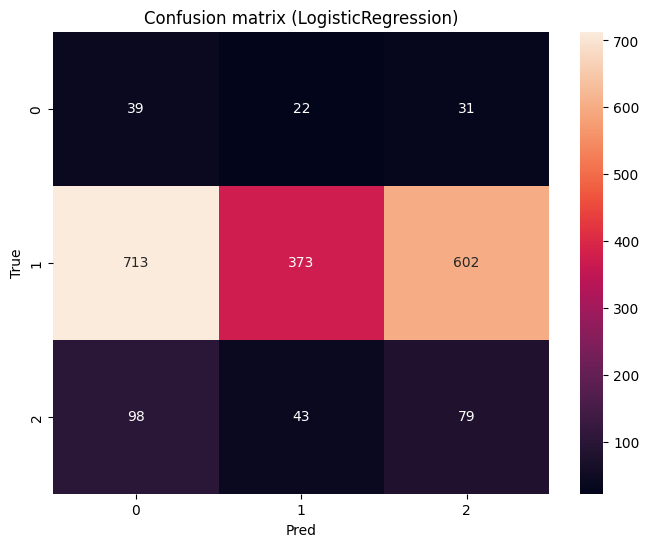

Model: SVC | Test acc: 0.8440 | F1-macro: 0.3051
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.84      1.00      0.92      1688
           2       0.00      0.00      0.00       220

    accuracy                           0.84      2000
   macro avg       0.28      0.33      0.31      2000
weighted avg       0.71      0.84      0.77      2000



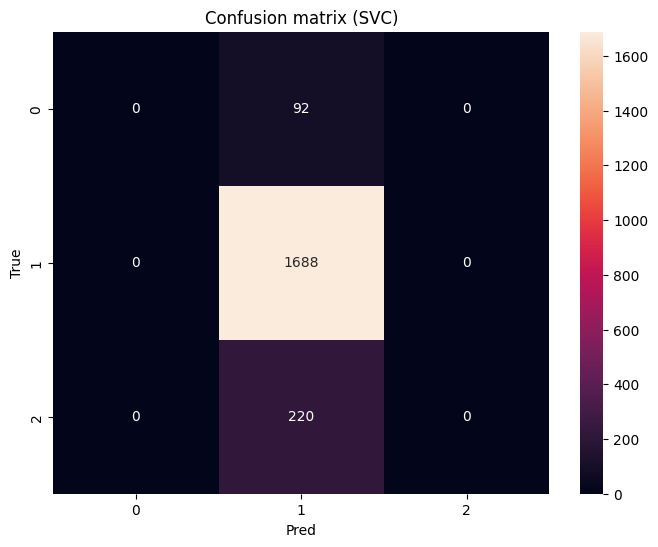

Model: RandomForest | Test acc: 0.8440 | F1-macro: 0.3051
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.84      1.00      0.92      1688
           2       0.00      0.00      0.00       220

    accuracy                           0.84      2000
   macro avg       0.28      0.33      0.31      2000
weighted avg       0.71      0.84      0.77      2000



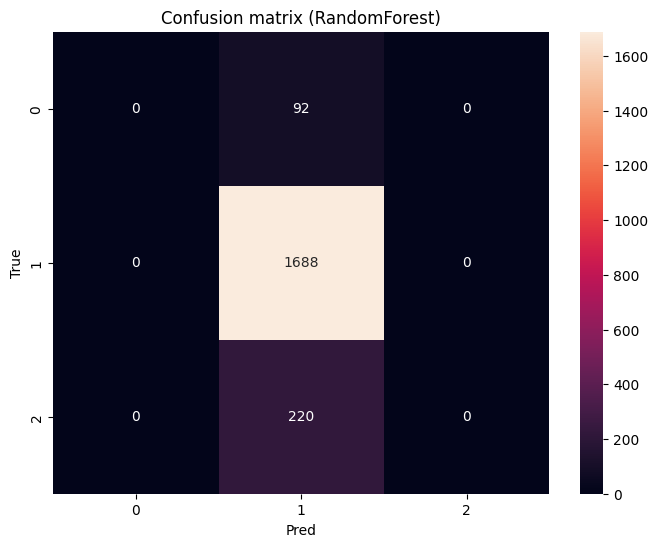

Best model selected: SVC


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Re-create the train/test split to get the original 'Problem Description' column
# This is necessary as 'x' was modified for Linear Regression and we need the original text column
x_train_original, x_test_original, _, _ = train_test_split(x, y, test_size=0.2, random_state=100)

# Re-define and re-fit pipe_lr to ensure it's fitted in this context
pipe_lr = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), max_features=10000)),
    ("clf", LogisticRegression(max_iter=300, class_weight="balanced", random_state=42))
])
pipe_lr.fit(x_train_original['Problem Description'], y_train)

candidates = {
    "LogisticRegression": pipe_lr,
    "SVC": gs_svc.best_estimator_,
    "RandomForest": gs_rf.best_estimator_
}

results = {}
for name, model in candidates.items():
    # Use the correct test set for prediction, which is x_test_original['Problem Description']
    y_test_pred = model.predict(x_test_original['Problem Description'])
    acc = accuracy_score(y_test, y_test_pred)
    f1m = f1_score(y_test, y_test_pred, average='macro')
    print(f"Model: {name} | Test acc: {acc:.4f} | F1-macro: {f1m:.4f}")
    print(classification_report(y_test, y_test_pred, zero_division=0))
    # small confusion matrix plot (top-10 classes for readability)
    labels = model.classes_
    cm = confusion_matrix(y_test, y_test_pred, labels=labels)
    # show only if classes <= 15
    if len(labels) <= 15:
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
        plt.title(f"Confusion matrix ({name})")
        plt.ylabel("True")
        plt.xlabel("Pred")
        plt.show()
    results[name] = {"model": model, "acc": acc, "f1": f1m}

# pick best by F1-macro
best_name = max(results.keys(), key=lambda k: results[k]['f1'])
best_model = results[best_name]['model']
print("Best model selected:", best_name)


## **Save best model**

In [40]:
import joblib

# Save the whole pipeline (includes TF-IDF inside pipeline)
model_filename = "vehicle_fault_model_pipeline.joblib"
joblib.dump(best_model, model_filename)
print("Saved model pipeline to", model_filename)

# Define text_col and label_col based on how the data was used
text_col = 'Problem Description'
label_col = 'Results'

# Save a small metadata (columns and sample)
meta = {
    "text_col": text_col,
    "label_col": label_col,
    "n_classes": len(label_encoder.classes_),
    "classes": list(label_encoder.classes_) # Ensure original string classes are saved
}
joblib.dump(meta, "model_metadata.joblib")
print("Saved metadata.")

Saved model pipeline to vehicle_fault_model_pipeline.joblib
Saved metadata.


In [41]:
import joblib
import numpy as np # Import numpy
import re # Import re for regex

# Load model (example)
model = joblib.load("vehicle_fault_model_pipeline.joblib")
meta = joblib.load("model_metadata.joblib")

def clean_text(text):
    # Convert to lowercase and remove non-alphabetic characters
    text = str(text).lower()
    text = re.sub(r'[^a-z\\s]', '', text)
    return text

def predict_fault(symptom_text, model=model, top_k=3):
    s = clean_text(symptom_text)
    # The model expects a list of strings for prediction
    pred_encoded = model.predict([s])[0]

    probs = None
    try:
        # May not be available for all models (e.g., some SVC kernels)
        proba = model.predict_proba([s])[0]
        # Get original class labels from label_encoder.classes_
        original_classes = label_encoder.classes_
        # top k
        idx = np.argsort(proba)[::-1][:top_k]
        probs = [(str(original_classes[i]), float(proba[i])) for i in idx]
    except Exception as e:
        # print(f"Could not get probabilities: {e}") # For debugging
        probs = None

    # Convert the encoded prediction back to the original label
    predicted_label = label_encoder.inverse_transform([pred_encoded])[0]
    # Explicitly convert predicted_label to string for consistent output and filtering
    predicted_label_str = str(predicted_label)

    # try to extract a recommended_fix if present in original df
    fix = ""
    try:
        # We use predicted_label_str for filtering against string values in df[label_col]
        fix_df = df[df[label_col] == predicted_label_str]
        if not fix_df.empty:
            fix = fix_df['How to Fix the Problem'].iloc[0]
    except Exception as e:
        # print(f"Could not find recommended fix: {e}") # For debugging
        fix = ""

    return {"predicted_fault": predicted_label_str, "recommended_fix": fix, "top_probs": probs}

# Test the inference function
tests = [
    "steering wheel vibrates heavily at 100 km/h",
    "car won't start only clicks",
    "brakes make a loud squeal when slowing down"
]

for t in tests:
    print("Input:", t)
    print(predict_fault(t))
    print()


Input: steering wheel vibrates heavily at 100 km/h
{'predicted_fault': 'Resolved', 'recommended_fix': 'Check and repair loose or damaged wiring connections', 'top_probs': [('Resolved', 0.8521053368161826), ('Unresolved', 0.09773800459323337), ('Monitoring', 0.0501566585905841)]}

Input: car won't start only clicks
{'predicted_fault': 'Resolved', 'recommended_fix': 'Check and repair loose or damaged wiring connections', 'top_probs': [('Resolved', 0.8521053368161826), ('Unresolved', 0.09773800459323337), ('Monitoring', 0.0501566585905841)]}

Input: brakes make a loud squeal when slowing down
{'predicted_fault': 'Resolved', 'recommended_fix': 'Check and repair loose or damaged wiring connections', 'top_probs': [('Resolved', 0.8521053368161826), ('Unresolved', 0.09773800459323337), ('Monitoring', 0.0501566585905841)]}



In [39]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train and transform y_test
# y_train and y_test are expected to be the original string labels from the train_test_split
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("Original y_train unique values (first 5 encoded values):", y_train_encoded[:5])
print("Encoded y_train unique values (original string classes):", label_encoder.classes_)
print("Original y_test unique values (first 5 encoded values):", y_test_encoded[:5])

# IMPORTANT: Reassign the encoded values to y_train and y_test for model training
y_train = y_train_encoded
y_test = y_test_encoded

Original y_train unique values (first 5 encoded values): [1 1 1 1 1]
Encoded y_train unique values (original string classes): ['Monitoring' 'Resolved' 'Unresolved']
Original y_test unique values (first 5 encoded values): [1 1 1 2 1]


## **Export cleaned dataset**

In [43]:
# Save cleaned dataset for records
df[[text_col, label_col]].to_csv("vehicle_fault_dataset_cleaned.csv", index=False)
print("Saved cleaned dataset to vehicle_fault_dataset_cleaned.csv")

# Save class mapping
class_df = pd.DataFrame({"label": best_model.classes_})
class_df.to_csv("class_labels.csv", index=False)
print("Saved class_labels.csv")

Saved cleaned dataset to vehicle_fault_dataset_cleaned.csv
Saved class_labels.csv


### **Data Visualization of prediction results**

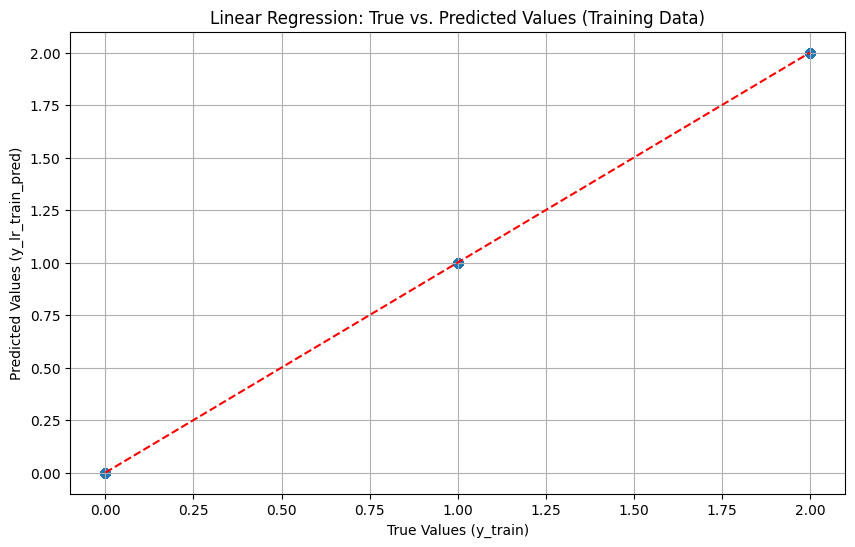

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


x_train_for_prediction = x_train.copy()


x_train_numerical_for_pred = x_train_for_prediction.drop(columns=categorical_cols)


x_train_encoded_array_for_pred = encoder.transform(x_train_for_prediction[categorical_cols])


x_train_encoded_df_for_pred = pd.DataFrame(x_train_encoded_array_for_pred,
                                         columns=encoder.get_feature_names_out(categorical_cols),
                                         index=x_train_for_prediction.index)


x_train_for_prediction = pd.concat([x_train_numerical_for_pred, x_train_encoded_df_for_pred], axis=1)


y_lr_train_pred = linear_model.predict(x_train_for_prediction)

plt.figure(figsize=(10, 6))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--') # Add y=x line
plt.title('Linear Regression: True vs. Predicted Values (Training Data)')
plt.xlabel('True Values (y_train)')
plt.ylabel('Predicted Values (y_lr_train_pred)')
plt.grid(True)
plt.show()